In [1]:
import os
import random
import glob

from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
import torch

import pandas as pd
import numpy as np

In [2]:
data_dir = "./images"
classes = os.listdir(data_dir)
classes.remove(".gitkeep")
classes

['풀업', '스쿼트', '벤치프레스', '데드리프트', '오버헤드프레스']

In [3]:
classes_dic = {}
for i, cls in enumerate(classes):
    classes_dic[cls] = i                  # data_dic[]
print(classes_dic)
print(classes)

{'풀업': 0, '스쿼트': 1, '벤치프레스': 2, '데드리프트': 3, '오버헤드프레스': 4}
['풀업', '스쿼트', '벤치프레스', '데드리프트', '오버헤드프레스']


In [4]:
data = glob.glob(os.path.join(data_dir + '/*/*.jpg'))

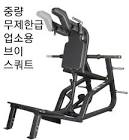

214 tensor([1]) 스쿼트


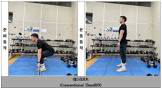

371 tensor([3]) 데드리프트


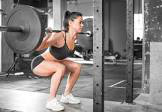

200 tensor([1]) 스쿼트


In [5]:
for i in range(3):
    index = random.randint(100, 600)
    image = data[index]
    # label = self.data[index].split('\\')[-2]
    label = classes_dic[Path(image).parts[-2]]
    # print(label)
    image = Image.open(image)
    image.show()
    # print(image, label)
    image = np.array(image)

    image = torch.FloatTensor(image)
    label = torch.LongTensor([int(label)])
    print(index, label, classes[label])

In [6]:
len(data)

600

In [7]:
x, y = 300, 300

for index in range(len(data)):
    image = data[index]
    label = classes_dic[Path(image).parts[-2]]

    image = Image.open(image)
    image = np.array(image)

    image = torch.FloatTensor(image)
    x = min(x, image.shape[0])
    y = min(y, image.shape[1])
    print(image.shape)
    label = torch.LongTensor([int(label)])
    print(index, label, classes[label])
print(x, y)

torch.Size([140, 140, 3])
0 tensor([0]) 풀업
torch.Size([140, 146, 3])
1 tensor([0]) 풀업
torch.Size([140, 140, 3])
2 tensor([0]) 풀업
torch.Size([110, 162, 3])
3 tensor([0]) 풀업
torch.Size([140, 140, 3])
4 tensor([0]) 풀업
torch.Size([140, 111, 3])
5 tensor([0]) 풀업
torch.Size([101, 162, 3])
6 tensor([0]) 풀업
torch.Size([87, 162, 3])
7 tensor([0]) 풀업
torch.Size([89, 162, 3])
8 tensor([0]) 풀업
torch.Size([105, 162, 3])
9 tensor([0]) 풀업
torch.Size([140, 141])
10 tensor([0]) 풀업
torch.Size([140, 140, 3])
11 tensor([0]) 풀업
torch.Size([134, 162, 3])
12 tensor([0]) 풀업
torch.Size([108, 162, 3])
13 tensor([0]) 풀업
torch.Size([130, 162, 3])
14 tensor([0]) 풀업
torch.Size([140, 140, 3])
15 tensor([0]) 풀업
torch.Size([91, 162, 3])
16 tensor([0]) 풀업
torch.Size([88, 162, 3])
17 tensor([0]) 풀업
torch.Size([140, 121, 3])
18 tensor([0]) 풀업
torch.Size([140, 159, 3])
19 tensor([0]) 풀업
torch.Size([140, 140, 3])
20 tensor([0]) 풀업
torch.Size([140, 78, 3])
21 tensor([0]) 풀업
torch.Size([139, 162, 3])
22 tensor([0]) 풀업
torch.

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [9]:
# ResNet 모델을 불러옵니다. 여기서는 ResNet18을 사용합니다.
net = torchvision.models.resnet18()

# 손실 함수와 옵티마이저를 정의합니다.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

"""# 모델을 훈련합니다.
for epoch in range(2):  # 데이터셋을 여러 번 훈련합니다.
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력 데이터를 받아옵니다.
        inputs, labels = data

        # 변화도를 0으로 초기화합니다.
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 수행합니다.
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # 매 2000 미니배치마다 출력합니다.
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0"""

"# 모델을 훈련합니다.\nfor epoch in range(2):  # 데이터셋을 여러 번 훈련합니다.\n    running_loss = 0.0\n    for i, data in enumerate(trainloader, 0):\n        # 입력 데이터를 받아옵니다.\n        inputs, labels = data\n\n        # 변화도를 0으로 초기화합니다.\n        optimizer.zero_grad()\n\n        # 순전파 + 역전파 + 최적화를 수행합니다.\n        outputs = net(inputs)\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # 통계를 출력합니다.\n        running_loss += loss.item()\n        if i % 2000 == 1999:    # 매 2000 미니배치마다 출력합니다.\n            print('[%d, %5d] loss: %.3f' %\n                  (epoch + 1, i + 1, running_loss / 2000))\n            running_loss = 0.0"

In [10]:
net = torchvision.models.densenet121()

# 손실 함수와 옵티마이저를 정의합니다.
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

"""# 모델을 훈련합니다.
for epoch in range(2):  # 데이터셋을 여러 번 훈련합니다.
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 입력 데이터를 받아옵니다.
        inputs, labels = data

        # 변화도를 0으로 초기화합니다.
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 수행합니다.
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # 매 2000 미니배치마다 출력합니다.
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0"""

"# 모델을 훈련합니다.\nfor epoch in range(2):  # 데이터셋을 여러 번 훈련합니다.\n    running_loss = 0.0\n    for i, data in enumerate(trainloader, 0):\n        # 입력 데이터를 받아옵니다.\n        inputs, labels = data\n\n        # 변화도를 0으로 초기화합니다.\n        optimizer.zero_grad()\n\n        # 순전파 + 역전파 + 최적화를 수행합니다.\n        outputs = net(inputs)\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        # 통계를 출력합니다.\n        running_loss += loss.item()\n        if i % 2000 == 1999:    # 매 2000 미니배치마다 출력합니다.\n            print('[%d, %5d] loss: %.3f' %\n                  (epoch + 1, i + 1, running_loss / 2000))\n            running_loss = 0.0"

In [28]:
import os
import random
import glob

from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
import torch

import pandas as pd
import numpy as np
import cv2


image_path = 'images/데드리프트/0.jpg'
# 이미지를 읽어옴
image = cv2.imread(image_path)
cv2.imshow('Image', image)
print(f"원본 이미지 크기: {image.shape[:3]}")

# 원하는 크기로 이미지를 조정
width = 224
height = 224
resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

# 조정된 이미지를 화면에 출력하거나 저장할 수 있습니다.
cv2.imshow('Resized Image', resized_image)
print(f"조정된 이미지 크기: {resized_image.shape[:3]}")

cv2.imwrite(image_path, resized_image)
print("이미지 크기 조정 및 덮어쓰기가 완료되었습니다.")

image = cv2.imread(image_path)
cv2.imshow('After Image', image)
cv2.waitKey(0)
print(f"현재 이미지 크기: {image.shape[:3]}")

원본 이미지 크기: (224, 224, 3)
조정된 이미지 크기: (224, 224, 3)
이미지 크기 조정 및 덮어쓰기가 완료되었습니다.
현재 이미지 크기: (224, 224, 3)


In [33]:
cv2.destroyAllWindows()

In [43]:
import os
import random
import glob

from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
import torch

import cv2

data_dir = './images'
data = glob.glob(os.path.join(data_dir + '/*/*.jpg'))

index = 155
image_path = data[index]
print(image_path)

# 이미지를 읽어옴
image = cv2.imread(image_path)
print(f"원본 크기: {image.shape[:3]}", end=" / ")

./images/스쿼트/49.jpg
원본 크기: (90, 162, 3) / 

In [44]:
# (224, 224)로 이미지를 조정
width = 224
height = 224
resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

# 조정한 이미지로 원본 이미지 덮어씌우기
cv2.imwrite(image_path, resized_image)

image = cv2.imread(image_path)
print(f"현재 이미지 크기: {image.shape[:3]}")

현재 이미지 크기: (224, 224, 3)


In [57]:
import os
import random
import glob

from pathlib import Path
from PIL import Image

from torch.utils.data import Dataset
import torch

import numpy as np


data_dir = './images'
classes = os.listdir(data_dir)     # 리스트로 저장
rm_list = []
print(classes)
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        rm_list.append(class_name)
for rm_name in rm_list:
    classes.remove(rm_name)
print(classes)

['풀업', 'preprocess.py', '.gitkeep', '스쿼트', '벤치프레스', '데드리프트', '오버헤드프레스', 'BSCrawling.py']
['풀업', '스쿼트', '벤치프레스', '데드리프트', '오버헤드프레스']


In [58]:
from torch import nn, Tensor
import torchvision.models as models


class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18Classifier, self).__init__()
        self.resnet18 = models.resnet18(pretrained=False)
        num_ftrs = self.resnet18.fc.in_features
        self.resnet18.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x: Tensor):
        return self.resnet18(x)


In [ ]:
# train.py로 이동
"""
# transform 설정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 훈련셋 설정
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# 모델을 초기화하고 손실 함수 및 옵티마이저를 정의합니다.
net = ResNet18Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
"""